In [7]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [4]:
data = pd.read_csv("groceries.csv", error_bad_lines=False)
data.shape                   #(6105, 4)

b'Skipping line 6: expected 4 fields, saw 5\nSkipping line 8: expected 4 fields, saw 5\nSkipping line 11: expected 4 fields, saw 5\nSkipping line 12: expected 4 fields, saw 9\nSkipping line 24: expected 4 fields, saw 5\nSkipping line 25: expected 4 fields, saw 11\nSkipping line 30: expected 4 fields, saw 6\nSkipping line 32: expected 4 fields, saw 7\nSkipping line 33: expected 4 fields, saw 5\nSkipping line 34: expected 4 fields, saw 8\nSkipping line 41: expected 4 fields, saw 6\nSkipping line 42: expected 4 fields, saw 13\nSkipping line 45: expected 4 fields, saw 8\nSkipping line 50: expected 4 fields, saw 10\nSkipping line 54: expected 4 fields, saw 10\nSkipping line 55: expected 4 fields, saw 5\nSkipping line 58: expected 4 fields, saw 7\nSkipping line 59: expected 4 fields, saw 6\nSkipping line 61: expected 4 fields, saw 7\nSkipping line 64: expected 4 fields, saw 5\nSkipping line 70: expected 4 fields, saw 8\nSkipping line 72: expected 4 fields, saw 7\nSkipping line 73: expected 4

(6105, 4)

In [9]:
# create dummies :
df = pd.get_dummies(data)
df.head()
df.shape          # (6105,559)

(6105, 559)

In [20]:
# apply apriori algorithm:
frequent_items = apriori(df, min_support=0.002, use_colnames=True)
frequent_items

,support,itemsets
0,0.008681,(citrus fruit_UHT-milk)
1,0.020311,(citrus fruit_beef)
2,0.009500,(citrus fruit_berries)
3,0.011466,(citrus fruit_beverages)
4,0.028829,(citrus fruit_bottled beer)
...,...,...
264,0.002457,"(semi-finished bread_whole milk, margarine_curd)"
265,0.004586,"(margarine_rolls/buns, semi-finished bread_who..."
266,0.002785,"(margarine_yogurt, semi-finished bread_whole m..."
267,0.002129,"(margarine_whipped/sour cream, semi-finished b..."


In [21]:
rules = association_rules(frequent_items, metric="lift", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(citrus fruit_beef),(semi-finished bread_other vegetables),0.020311,0.031122,0.002948,0.145161,4.664261,0.002316,1.133404
1,(semi-finished bread_other vegetables),(citrus fruit_beef),0.031122,0.020311,0.002948,0.094737,4.664261,0.002316,1.082214
2,(semi-finished bread_root vegetables),(citrus fruit_beef),0.012285,0.020311,0.002785,0.226667,11.159677,0.002535,1.266839
3,(citrus fruit_beef),(semi-finished bread_root vegetables),0.020311,0.012285,0.002785,0.137097,11.159677,0.002535,1.144642
4,(semi-finished bread_liquor),(citrus fruit_bottled beer),0.004750,0.028829,0.003440,0.724138,25.118534,0.003303,3.520495
...,...,...,...,...,...,...,...,...,...
129,"(margarine_soda, semi-finished bread_rolls/buns)",(citrus fruit_sausage),0.006552,0.047174,0.002293,0.350000,7.419271,0.001984,1.465885
130,"(citrus fruit_sausage, semi-finished bread_rol...",(margarine_soda),0.009173,0.027191,0.002293,0.250000,9.194277,0.002044,1.297079
131,(margarine_soda),"(citrus fruit_sausage, semi-finished bread_rol...",0.027191,0.009173,0.002293,0.084337,9.194277,0.002044,1.082088
132,(citrus fruit_sausage),"(margarine_soda, semi-finished bread_rolls/buns)",0.047174,0.006552,0.002293,0.048611,7.419271,0.001984,1.044208


In [22]:
rules.sort_values("lift", ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
106,(margarine_liquor),(semi-finished bread_bottled beer),0.003276,0.018346,0.002457,0.750000,40.881696,0.002397,3.926618
107,(semi-finished bread_bottled beer),(margarine_liquor),0.018346,0.003276,0.002457,0.133929,40.881696,0.002397,1.150857
4,(semi-finished bread_liquor),(citrus fruit_bottled beer),0.004750,0.028829,0.003440,0.724138,25.118534,0.003303,3.520495
5,(citrus fruit_bottled beer),(semi-finished bread_liquor),0.028829,0.004750,0.003440,0.119318,25.118534,0.003303,1.130090
116,(margarine_other vegetables),(semi-finished bread_root vegetables),0.008518,0.012285,0.002129,0.250000,20.350000,0.002025,1.316953
...,...,...,...,...,...,...,...,...,...
19,(semi-finished bread_rolls/buns),(citrus fruit_other vegetables),0.050287,0.046192,0.003276,0.065147,1.410354,0.000953,1.020276
98,(citrus fruit_whole milk),(margarine_rolls/buns),0.085995,0.019328,0.002293,0.026667,1.379661,0.000631,1.007539
99,(margarine_rolls/buns),(citrus fruit_whole milk),0.019328,0.085995,0.002293,0.118644,1.379661,0.000631,1.037044
101,(citrus fruit_whole milk),(margarine_soda),0.085995,0.027191,0.003112,0.036190,1.330981,0.000774,1.009338


In [23]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(citrus fruit_beef),(semi-finished bread_other vegetables),0.020311,0.031122,0.002948,0.145161,4.664261,0.002316,1.133404
1,(semi-finished bread_other vegetables),(citrus fruit_beef),0.031122,0.020311,0.002948,0.094737,4.664261,0.002316,1.082214
2,(semi-finished bread_root vegetables),(citrus fruit_beef),0.012285,0.020311,0.002785,0.226667,11.159677,0.002535,1.266839
3,(citrus fruit_beef),(semi-finished bread_root vegetables),0.020311,0.012285,0.002785,0.137097,11.159677,0.002535,1.144642
4,(semi-finished bread_liquor),(citrus fruit_bottled beer),0.004750,0.028829,0.003440,0.724138,25.118534,0.003303,3.520495
...,...,...,...,...,...,...,...,...,...
129,"(margarine_soda, semi-finished bread_rolls/buns)",(citrus fruit_sausage),0.006552,0.047174,0.002293,0.350000,7.419271,0.001984,1.465885
130,"(citrus fruit_sausage, semi-finished bread_rol...",(margarine_soda),0.009173,0.027191,0.002293,0.250000,9.194277,0.002044,1.297079
131,(margarine_soda),"(citrus fruit_sausage, semi-finished bread_rol...",0.027191,0.009173,0.002293,0.084337,9.194277,0.002044,1.082088
132,(citrus fruit_sausage),"(margarine_soda, semi-finished bread_rolls/buns)",0.047174,0.006552,0.002293,0.048611,7.419271,0.001984,1.044208


Text(0, 0.5, 'confidence')

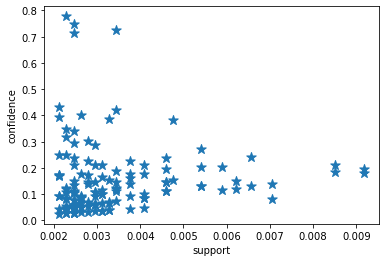

In [26]:
# for visulisation :
import matplotlib.pyplot as plt
support = []
confidence = []
for i in rules.support:
    support.append(i)
for j in rules.confidence:
    confidence.append(j)
plt.scatter(support, confidence, marker="*", s=100)
plt.xlabel("support")
plt.ylabel("confidence")
